# Handwritten Digits recogniction using a CNN Model

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.datasets import mnist
import random

In [4]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()

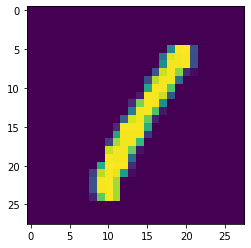

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3])

In [6]:
x_train = x_train/255.0
x_val = x_val/255.0

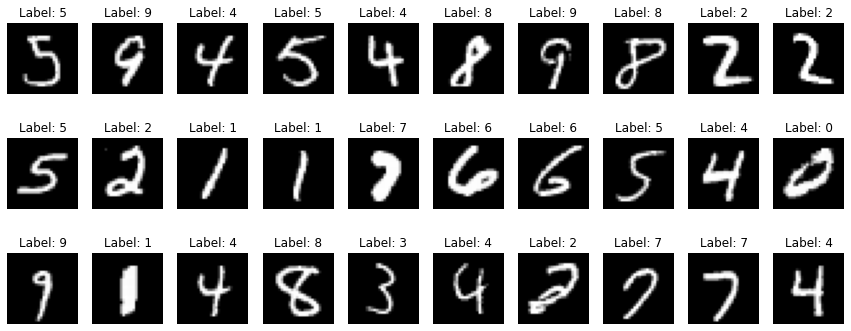

In [9]:
test_samples = random.sample(range(0, len(x_train)), 30) 
pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {pred[y_train[i]]}')
    plt.axis('off')

In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [11]:
x_train[0].shape

(28, 28, 1)

In [12]:
input_shape = x_train[0].shape

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

2022-01-07 23:07:27.730570: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

In [17]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1395 - accuracy: 0.9590 - val_loss: 0.0449 - val_accuracy: 0.9852
Epoch 2/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0793 - accuracy: 0.9764 - val_loss: 0.0424 - val_accuracy: 0.9863
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0298 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0496 - accuracy: 0.9850 - val_loss: 0.0290 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0306 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0335 -

In [18]:
model.evaluate(x_val, y_val)

313/313 [==============================] - 2s 6ms/step - loss: 0.0301 - accuracy: 0.9922


[0.03010387346148491, 0.9922000169754028]

In [19]:
model.save("models/MNIST.h5")

In [13]:
from tensorflow import keras
model = keras.models.load_model('models/MNIST.h5')

2022-01-09 21:35:18.001960: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
predictions = model.predict(x_val)

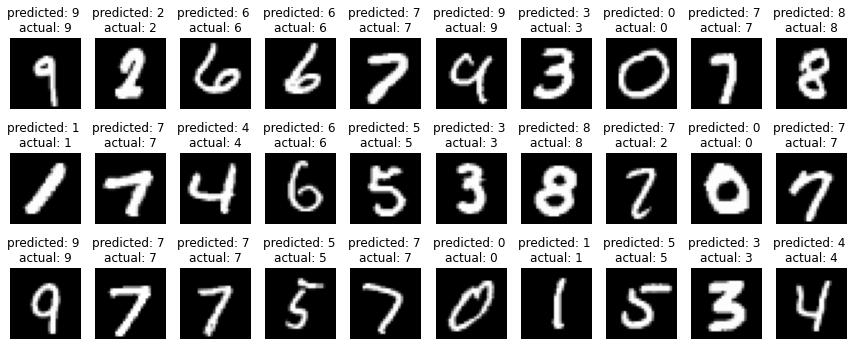

In [15]:
import random

test_samples = random.sample(range(0, len(x_val)), 30) 

plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_val[i], cmap='gray')
    plt.title(f'predicted: {np.argmax(predictions[i])} \nactual: {y_val[i]}')
    plt.axis('off')

Character recognized : 3


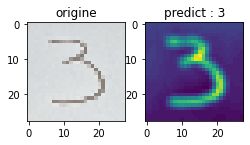

In [16]:
import cv2
from tensorflow.keras.preprocessing import image 

img = cv2.imread("images/3.png")
plt.subplot(1, 3, 1)  
plt.title("origine")
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.resize(img, (28,28))
img = 255 - img
# img = img/255.0


img_6 = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img_6 = image.img_to_array(img_6)
img_6.reshape(28, 28)
img_6 = np.expand_dims(img_6, axis=0)


pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A' ,'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

pre = np.argmax(model.predict(img_6))
prediction = (model.predict(img_6) > 0.5).astype("int32")
# print("Character recognized :", pred[np.argmax(prediction)])
print("Character recognized :", pred[pre])


plt.subplot(1, 3, 2) 
plt.title("predict : " + pred[pre]) 
plt.imshow(img)

# plt.subplot(1, 3, 3) 
# plt.title("exemple") 
# plt.imshow(x_val[0])